In [1]:
import numpy as np

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [3]:

data_raw=load_iris()

data_x=data_raw['data'][:100]
data_y=data_raw['target'][:100]

data_all=pd.DataFrame(data_x)
data_all['target']=data_y

test_data=data_all.sample(frac=0.2)

train_data=data_all.drop(test_data.index)

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}}}$$

$${\displaystyle {\frac {d}{dx}}f(x)={\frac {e^{x}}{(1+e^{x})^{2}}}=f(x)(1-f(x))}
$$

In [4]:
def sigmoid(x,deri=False):
    x=np.array(x,dtype=np.float128)
    if deri==False:
        
        return np.array(1/(1+np.exp(-x)),dtype=np.float128)
    elif deri==True:
        return np.array(sigmoid(x)*(1-sigmoid(x)),dtype=np.float128)
    else:
        print('input error')

In [5]:
X=train_data.iloc[:,0:4]
X=X.T.as_matrix()
Y=train_data.iloc[:,4]
Y=Y.T.as_matrix().reshape(1,-1)

In [6]:
X_mean=X.mean(axis=1).reshape(X.shape[0],1)

In [7]:
X_std=X.std(axis=1).reshape(X.shape[0],1)

In [8]:
X=((X-X_mean)/X_std)

In [9]:
X_test=test_data.iloc[:,0:4]
X_test=X_test.T.as_matrix()
Y_test=test_data.iloc[:,4]
Y_test=Y_test.as_matrix().reshape(1,-1)

# Net shape: data dimention of  each layer =[4,5,2,1]
 
X.shape=(4,80)

$ Z^{[1]}=W^{[1]}X+B^{[1]}   \\
A^{[1]}=sigmoid(Z^{[1]})   \\
Z^{[2]}=W^{[2]}X+B^{[2]}   \\
A^{[2]}=sigmoid(Z^{[2]})  
$

 

## layer 0 =data input

In [10]:
X.shape

(4, 80)

In [11]:
Y.shape

(1, 80)

In [12]:
def cost(AL,Y):
    m=Y.shape[1]
    cost = (-1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    return   cost



In [13]:

W1=100*0.001*np.random.rand(5,4)
B1=np.zeros(shape=(W1.shape[0],1))
W2=100*0.001*np.random.rand(2,5)
B2=np.zeros(shape=(W2.shape[0],1))
W3=100*0.001*np.random.rand(1,2)
B3=np.zeros(shape=(W3.shape[0],1))






In [14]:
cost_list=[]
iterations=[]
 

In [15]:
iteration_number=1000000
for i in range(iteration_number):

    # forward

    learning_rate=0.0075*5

    Z1=W1.dot(X)+B1   
    A1=sigmoid(Z1)
    A1=np.array(A1,dtype=np.float128)

    Z2=W2.dot(A1)+B2
    A2=sigmoid(Z2)
    A2=np.array(A2,dtype=np.float128)

    Z3=W3.dot(A2)+B3
    A3=sigmoid(Z3)
    A3=np.array(A3,dtype=np.float128)


    dA3 = - (np.divide(Y, A3) - np.divide(1 - Y, 1 - A3))
    dA3=np.array(dA3,dtype=np.float128)

    if i %(iteration_number/100)==0:

        cost_list.append(cost(A3,Y))
        iterations.append(i)
        try:
            print("cost = ",cost_list[-1]," ; cost/cost_previous =  ",(cost_list[-1]/cost_list[-2]))
        except:
            print("cost = ",cost_list[-1])

        
        
        
    # backforward




    m=Y.shape[1]
    

    dW3=(1/m)*(dA3*sigmoid(Z3,deri=True)).dot(A2.T )

    dZ3=dA3*sigmoid(Z3,deri=True)

    dB3=(1/m)*np.sum(dZ3,axis=1,keepdims=True)


    dA2=W3.T.dot(dZ3)

    dZ2=dA2*sigmoid(Z2,deri=True)

    dW2=(1/m)*dZ2.dot(A1.T)

    dB2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)

    dA1=W2.T.dot(dZ2)
    dZ1=dA1*sigmoid(Z1,deri=True)

    A0=X

    dW1=(1/m)*dZ1.dot(A0.T)

    dB1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)



    W1+=-learning_rate* dW1
    B1+=-learning_rate* dB1
    W2+=-learning_rate* dW2
    B2+=-learning_rate* dB2
    W3+=-learning_rate* dW3
    B3+=-learning_rate* dB3


cost =  0.693991863063
cost =  0.0199465657925  ; cost/cost_previous =   0.0287417862573
cost =  0.00582809932098  ; cost/cost_previous =   0.292185601352
cost =  0.00338892007945  ; cost/cost_previous =   0.581479465742
cost =  0.00238582836385  ; cost/cost_previous =   0.704008447503
cost =  0.00184001504526  ; cost/cost_previous =   0.771226913529
cost =  0.00149708578837  ; cost/cost_previous =   0.813626927796
cost =  0.00126173538684  ; cost/cost_previous =   0.842794311886
cost =  0.00109024168018  ; cost/cost_previous =   0.864081083523
cost =  0.000959737659609  ; cost/cost_previous =   0.880298081659
cost =  0.00085710551324  ; cost/cost_previous =   0.893062291198
cost =  0.000774283002007  ; cost/cost_previous =   0.903369526909
cost =  0.000706042691593  ; cost/cost_previous =   0.911866449041
cost =  0.000648847018757  ; cost/cost_previous =   0.918991197676
cost =  0.000600216675209  ; cost/cost_previous =   0.925051141267
cost =  0.000558362523338  ; cost/cost_previous 

In [16]:
cost_list

[0.69399186306266976684,
 0.019946565792473972478,
 0.0058280993209797983448,
 0.0033889200794521835346,
 0.0023858283638469174514,
 0.0018400150452585512466,
 0.0014970857883714472653,
 0.001261735386844258871,
 0.0010902416801831527567,
 0.00095973765960947646892,
 0.0008571055132395416418,
 0.00077428300200666033876,
 0.00070604269159281058332,
 0.00064884701875729352293,
 0.00060021667520912283481,
 0.00055836252333842647736,
 0.00052196112383634020469,
 0.0004900125059371549482,
 0.00046174705419720033373,
 0.00043656280305215842286,
 0.00041398215348173502548,
 0.00039362133887221052222,
 0.0003751684644541813907,
 0.00035836743764592917489,
 0.00034300602481158388728,
 0.00032890684911706428999,
 0.0003159205179150204891,
 0.00030392031429777438141,
 0.0002927980527115480407,
 0.00028246081135799542362,
 0.00027282833236606658157,
 0.00026383093578273968019,
 0.00025540783269784146012,
 0.00024750575116656604205,
 0.00024007780929507269435,
 0.00023308258513493230544,
 0.0002264

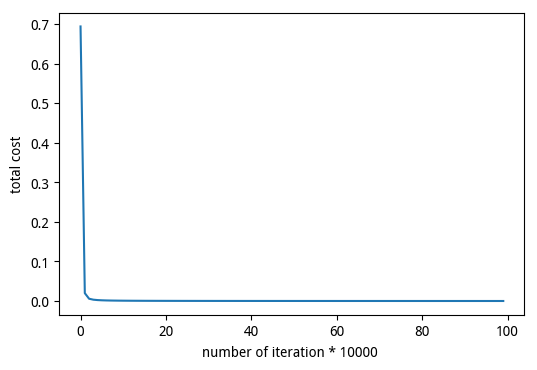

In [27]:
plt.plot(cost_list)
plt.xlabel('number of iteration * 10000 ')
plt.ylabel('total cost')
plt.show()

In [18]:
Y_test.shape

(1, 20)

In [19]:
cost_list

[0.69399186306266976684,
 0.019946565792473972478,
 0.0058280993209797983448,
 0.0033889200794521835346,
 0.0023858283638469174514,
 0.0018400150452585512466,
 0.0014970857883714472653,
 0.001261735386844258871,
 0.0010902416801831527567,
 0.00095973765960947646892,
 0.0008571055132395416418,
 0.00077428300200666033876,
 0.00070604269159281058332,
 0.00064884701875729352293,
 0.00060021667520912283481,
 0.00055836252333842647736,
 0.00052196112383634020469,
 0.0004900125059371549482,
 0.00046174705419720033373,
 0.00043656280305215842286,
 0.00041398215348173502548,
 0.00039362133887221052222,
 0.0003751684644541813907,
 0.00035836743764592917489,
 0.00034300602481158388728,
 0.00032890684911706428999,
 0.0003159205179150204891,
 0.00030392031429777438141,
 0.0002927980527115480407,
 0.00028246081135799542362,
 0.00027282833236606658157,
 0.00026383093578273968019,
 0.00025540783269784146012,
 0.00024750575116656604205,
 0.00024007780929507269435,
 0.00023308258513493230544,
 0.0002264

In [20]:
# X_test_mean=X_test.mean(axis=1).reshape(X_test.shape[0],1)
# X_test_std=X_test.std(axis=1).reshape(X_test.shape[0],1)

X_test=(X_test-X_mean)/X_std

In [21]:
Z1=W1.dot(X_test)+B1   
A1=sigmoid(Z1)

Z2=W2.dot(A1)+B2
A2=sigmoid(Z2)

Z3=W3.dot(A2)+B3
A3=sigmoid(Z3)

cost(A3,Y_test)

8.0449143475427322136e-05

In [22]:
A3[0].round(4)

array([ 0.9999,  0.0001,  0.9999,  0.0001,  0.9999,  0.0001,  0.0001,
        0.0001,  0.0001,  0.9999,  0.0001,  0.9999,  0.0001,  0.9999,
        0.9999,  0.0001,  0.9999,  0.9999,  0.0001,  0.9999], dtype=float128)

In [23]:
Y_estimate=A3[0].round()

In [24]:
Y_real=Y_test[0]

In [25]:
recall_score(Y_real,Y_estimate)

1.0

In [26]:
precision_score(Y_real,Y_estimate)

1.0